In [1]:
!pip install folium
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import numpy as np
import reverse_geocoder as rg
import reverse_geocode 
from geopy.geocoders import Nominatim

In [2]:
zero_access_data = pd.read_csv("zeroaccess.csv", encoding='utf8')
state_internet_data = pd.read_csv('state-internets.csv')
county_data = pd.read_csv('county-data.csv')

In [3]:
zero_access_data["lat"] = zero_access_data["lat"].astype(str)
zero_access_data["long"] = zero_access_data["long"].astype(str)
zero_access_data["location"] = zero_access_data["lat"] + ", " + zero_access_data["long"]
zero_access_data.head(10)

,lat,long,location
0,-10.0,-55.0,"-10.0, -55.0"
1,38.0888,-78.5592,"38.0888, -78.5592"
2,38.999,-84.6266,"38.999, -84.6266"
3,48.621,7.4944,"48.621, 7.4944"
4,43.2342,-86.2484,"43.2342, -86.2484"
5,47.0,20.0,"47.0, 20.0"
6,44.8012,-68.7778,"44.8012, -68.7778"
7,51.3333,1.4333,"51.3333, 1.4333"
8,36.058,-88.8253,"36.058, -88.8253"
9,20.6,-100.3833,"20.6, -100.3833"


In [4]:
def get_country(latitudes, longitudes):
    coordinates = list(zip(latitudes, longitudes))
    locations = rg.search(coordinates)
    return [loc['cc'] for loc in locations]
def get_state(latitudes, longitudes):
    coordinates = list(zip(latitudes, longitudes))
    locations = rg.search(coordinates)
    return [loc['admin1'] for loc in locations]
def get_county(latitudes, longitudes):
    coordinates = list(zip(latitudes, longitudes))
    locations = rg.search(coordinates)
    return [loc['name'] for loc in locations]



latitudes = zero_access_data['lat'].tolist()
longitudes = zero_access_data['long'].tolist()

country_codes = get_country(latitudes, longitudes)


zero_access_data['country'] = country_codes

zero_access_data = zero_access_data[zero_access_data['country'] == 'US']

state = get_state(latitudes, longitudes)
county = get_county(latitudes, longitudes)

zero_access_data['state'] = state
zero_access_data['county'] = county

zero_access_data = zero_access_data.replace('US', 'United States')

zero_access_data.head(10)


Loading formatted geocoded file...


ValueError: Length of values (808446) does not match length of index (280493)

In [5]:
county_data = county_data.rename(columns={'subregion' : 'county', 'region': 'state'})
county_data['state'] = county_data['state'].str.title()
county_data['county'] = county_data['county'].str.title()

In [31]:
merged_df = pd.merge(county_data, state_internet_data, on='state')
merged_df = pd.merge(county_data, zero_access_data, on=['county', 'state'])
merged_df.head(10)

,county,state,pop,income,ipaddr,ufo2010,lat,long,location,country
0,Abbeville,South Carolina,25101,34670,30330,2,34.1621,-82.4333,"34.1621, -82.4333",United States
1,Abbeville,South Carolina,25101,34670,30330,2,34.1621,-82.4333,"34.1621, -82.4333",United States
2,Abbeville,South Carolina,25101,34670,30330,2,34.1621,-82.4333,"34.1621, -82.4333",United States
3,Abbeville,South Carolina,25101,34670,30330,2,34.1621,-82.4333,"34.1621, -82.4333",United States
4,Abbeville,South Carolina,25101,34670,30330,2,34.1621,-82.4333,"34.1621, -82.4333",United States
5,Abbeville,South Carolina,25101,34670,30330,2,34.1621,-82.4333,"34.1621, -82.4333",United States
6,Abbeville,South Carolina,25101,34670,30330,2,34.1621,-82.4333,"34.1621, -82.4333",United States
7,Abbeville,South Carolina,25101,34670,30330,2,34.1621,-82.4333,"34.1621, -82.4333",United States
8,Abbeville,South Carolina,25101,34670,30330,2,34.1621,-82.4333,"34.1621, -82.4333",United States
9,Abbeville,South Carolina,25101,34670,30330,2,34.1621,-82.4333,"34.1621, -82.4333",United States


In [35]:
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)
HeatMap(data=merged_df[['lat', 'long']], radius=8).add_to(m)
m

Correlation coefficient: 0.20630694435288954


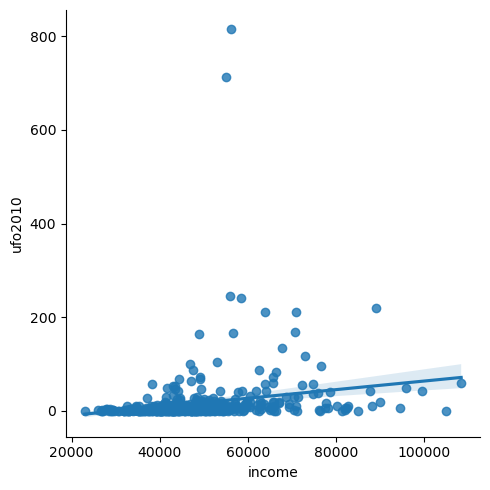

In [40]:

import seaborn as sns
county_data = merged_df.groupby('county').agg({'income': 'mean','ufo2010': 'mean'})
corr_coef = county_data.corr().loc['income', 'ufo2010']
sns.lmplot(x='income', y='ufo2010', data=county_data)
print('Correlation coefficient:', corr_coef)
